### Student grades prediction

#### Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

#### CGPA : 
The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
#### Predict - CGPA of a student based on different grades in four years.


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [9]:
#read data from github link

data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')#, names=columns )
data.sample(7)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
495,CS-97496,A-,A,A,B+,A,A-,A,B-,A,...,B+,B+,A,B,B+,B-,A-,C,B-,3.576
139,CS-97140,D+,D,C,C-,D,D,D,D+,C+,...,D+,C+,D,D+,B-,B,D+,D+,B-,1.708
187,CS-97188,B,A-,B+,B-,B,A-,B+,B+,D+,...,B-,C+,B+,C+,A-,B+,B,B,B,2.895
416,CS-97417,C,D+,D,C-,B,C+,B+,B-,C,...,A,B-,C,A-,B,A,B+,A-,NaN,2.773
505,CS-97506,A-,C,A,B+,A,A-,B,B,B+,...,A+,A,A-,A,A,B+,A-,B+,B,3.443
350,CS-97351,B+,A-,A+,B+,A-,A,B+,A-,A,...,A+,A-,A,A-,NaN,A,B,A,B+,3.651
136,CS-97137,D,D+,C-,D,C-,C-,D,C-,B-,...,C-,C-,D+,C-,A-,A-,C,D,B-,1.714


In [3]:
data.shape

(571, 43)

rows = 571 and columns = 43

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

#### all columns are in Object data type except CGPA which is in float64 data type

### # Check for Nulls in dataset

In [5]:
data.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

### Observations : Many columns are having Null Values

In [6]:
for column in data:
    print(data[column].value_counts())
    

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B

#### Observations : the columns 'Seat No.' and 'CGPA' are continious data while other columnsa are having categorical data

#### So our problem is related to Regression as the label column - 'CGPA' is continious in nature

#### # dropping  column 'Seat No', as this column is containing only Identity of the student, so dropping the same 

In [10]:
data.drop(['Seat No.'], axis=1, inplace=True)
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


### # Seperating Features and lables

In [12]:
X=data.drop(['CGPA'], axis=1)
y=data['CGPA']
X.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A


### # Treating the null values

#### our features columns are having catagorical data, so we can not use 'Mean' for replacing 'NaN' valuse, so we use 'Mode' instead

finding mode for each column

In [21]:
for column in X:
    print('\n Mode for ', column, ' is : ' , X[column].mode())


 Mode for  PH-121  is :  0    A-
Name: PH-121, dtype: object

 Mode for  HS-101  is :  0    A-
Name: HS-101, dtype: object

 Mode for  CY-105  is :  0    A
Name: CY-105, dtype: object

 Mode for  HS-105/12  is :  0    A
Name: HS-105/12, dtype: object

 Mode for  MT-111  is :  0    A-
Name: MT-111, dtype: object

 Mode for  CS-105  is :  0    A
Name: CS-105, dtype: object

 Mode for  CS-106  is :  0    A-
Name: CS-106, dtype: object

 Mode for  EL-102  is :  0    A-
Name: EL-102, dtype: object

 Mode for  EE-119  is :  0    A-
Name: EE-119, dtype: object

 Mode for  ME-107  is :  0    A-
Name: ME-107, dtype: object

 Mode for  CS-107  is :  0    A
Name: CS-107, dtype: object

 Mode for  HS-205/20  is :  0    A-
Name: HS-205/20, dtype: object

 Mode for  MT-222  is :  0    A-
Name: MT-222, dtype: object

 Mode for  EE-222  is :  0    A
Name: EE-222, dtype: object

 Mode for  MT-224  is :  0    A-
Name: MT-224, dtype: object

 Mode for  CS-210  is :  0    A-
Name: CS-210, dtype: object



#### # Filling 'NaN' with mode

In [30]:
X['PH-121']=X['PH-121'].fillna('A-')
X['HS-101']=X['HS-101'].fillna('A-')
X['HS-101']=X['HS-101'].fillna('A')
X['CY-105']=X['CY-105'].fillna('A')
X['HS-105/12']=X['HS-105/12'].fillna('A')
X['MT-111']=X['MT-111'].fillna('A-')
X['CS-105']=X['CS-105'].fillna('A')
X['CS-106']=X['CS-106'].fillna('A-')
X['EL-102']=X['EL-102'].fillna('A-')
X['EE-119']=X['EE-119'].fillna('A-')
X['ME-107']=X['ME-107'].fillna('A-')
X['CS-107']=X['CS-107'].fillna('A')
X['HS-205/20']=X['HS-205/20'].fillna('A-')
X['MT-222']=X['MT-222'].fillna('A-')
X['EE-222']=X['EE-222'].fillna('A')
X['MT-224']=X['MT-224'].fillna('A-')
X['CS-210']=X['CS-210'].fillna('A-')
X['CS-211']=X['CS-211'].fillna('A-')
X['CS-203']=X['CS-203'].fillna('A-')
X['CS-214']=X['CS-214'].fillna('C')
X['EE-217']=X['EE-217'].fillna('A-')
X['CS-212']=X['CS-212'].fillna('A-')
X['CS-215']=X['CS-215'].fillna('A-')
X['MT-331']=X['MT-331'].fillna('A')
X['EF-303']=X['EF-303'].fillna('B')
X['HS-304']=X['HS-304'].fillna('A-')
X['CS-301']=X['CS-301'].fillna('A-')
X['CS-302']=X['CS-302'].fillna('A-')
X['TC-383']=X['TC-383'].fillna('A')
X['MT-442']=X['MT-442'].fillna('A-')
X['EL-332']=X['EL-332'].fillna('A-')
X['CS-318']=X['CS-318'].fillna('A-')
X['CS-306']=X['CS-306'].fillna('A-')
X['CS-312']=X['CS-312'].fillna('A+')
X['CS-317']=X['CS-317'].fillna('B-')
X['CS-403']=X['CS-403'].fillna('A')
X['CS-421']=X['CS-421'].fillna('B')
X['CS-406']=X['CS-406'].fillna('A-')
X['CS-414']=X['CS-414'].fillna('A')
X['CS-419']=X['CS-419'].fillna('A-')
X['CS-423']=X['CS-423'].fillna('A-')
X['CS-412']=X['CS-412'].fillna('A-')

In [31]:
X.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
dtype: int64

#### No Null values found now

### # Encoding the object data

In [32]:
lab_enc=LabelEncoder()

for column in X:
    df=lab_enc.fit_transform(X[column])
    X[column]=pd.Series(df)

X

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   PH-121     571 non-null    int32
 1   HS-101     571 non-null    int32
 2   CY-105     571 non-null    int32
 3   HS-105/12  571 non-null    int32
 4   MT-111     571 non-null    int32
 5   CS-105     571 non-null    int32
 6   CS-106     571 non-null    int32
 7   EL-102     571 non-null    int32
 8   EE-119     571 non-null    int32
 9   ME-107     571 non-null    int32
 10  CS-107     571 non-null    int32
 11  HS-205/20  571 non-null    int32
 12  MT-222     571 non-null    int32
 13  EE-222     571 non-null    int32
 14  MT-224     571 non-null    int32
 15  CS-210     571 non-null    int32
 16  CS-211     571 non-null    int32
 17  CS-203     571 non-null    int32
 18  CS-214     571 non-null    int32
 19  EE-217     571 non-null    int32
 20  CS-212     571 non-null    int32
 21  CS-215     571 n

#### # changing the dtype form 'int32' to 'float64'

In [34]:
for column in X:
    X[column]=X[column].astype(float)


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

Checking null values again

In [36]:
X.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
dtype: int64

#### Checking the values in all columns

In [39]:
for column in X:
    print(X[column].value_counts())
    

2.0     112
0.0     111
4.0      61
3.0      57
5.0      56
9.0      44
6.0      33
7.0      31
10.0     22
1.0      22
8.0      19
12.0      2
11.0      1
Name: PH-121, dtype: int64
2.0     82
5.0     78
6.0     68
3.0     63
4.0     59
8.0     50
7.0     47
9.0     45
0.0     38
10.0    36
1.0      4
11.0     1
Name: HS-101, dtype: int64
0.0     178
2.0     120
4.0      50
3.0      49
5.0      42
9.0      31
1.0      31
6.0      19
7.0      17
8.0      16
10.0     14
12.0      3
11.0      1
Name: CY-105, dtype: int64
0.0     97
2.0     75
4.0     70
3.0     57
9.0     45
6.0     41
5.0     40
7.0     39
8.0     36
10.0    34
1.0     34
12.0     2
11.0     1
Name: HS-105/12, dtype: int64
2.0     107
0.0     100
5.0      70
4.0      62
3.0      55
8.0      39
7.0      33
6.0      30
9.0      26
1.0      23
10.0     21
12.0      3
11.0      2
Name: MT-111, dtype: int64
0.0     151
2.0     134
4.0      60
3.0      51
1.0      43
5.0      38
7.0      23
6.0      22
8.0      22
10.0     15

### # EDA

#### # Basic Stats 

Though the basic stats are not that important in this dataset as features are containing catagorical values

In [41]:
X.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.106830,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,2.855123,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,4.000000,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,6.000000,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,12.000000,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000


#### # Count Plot

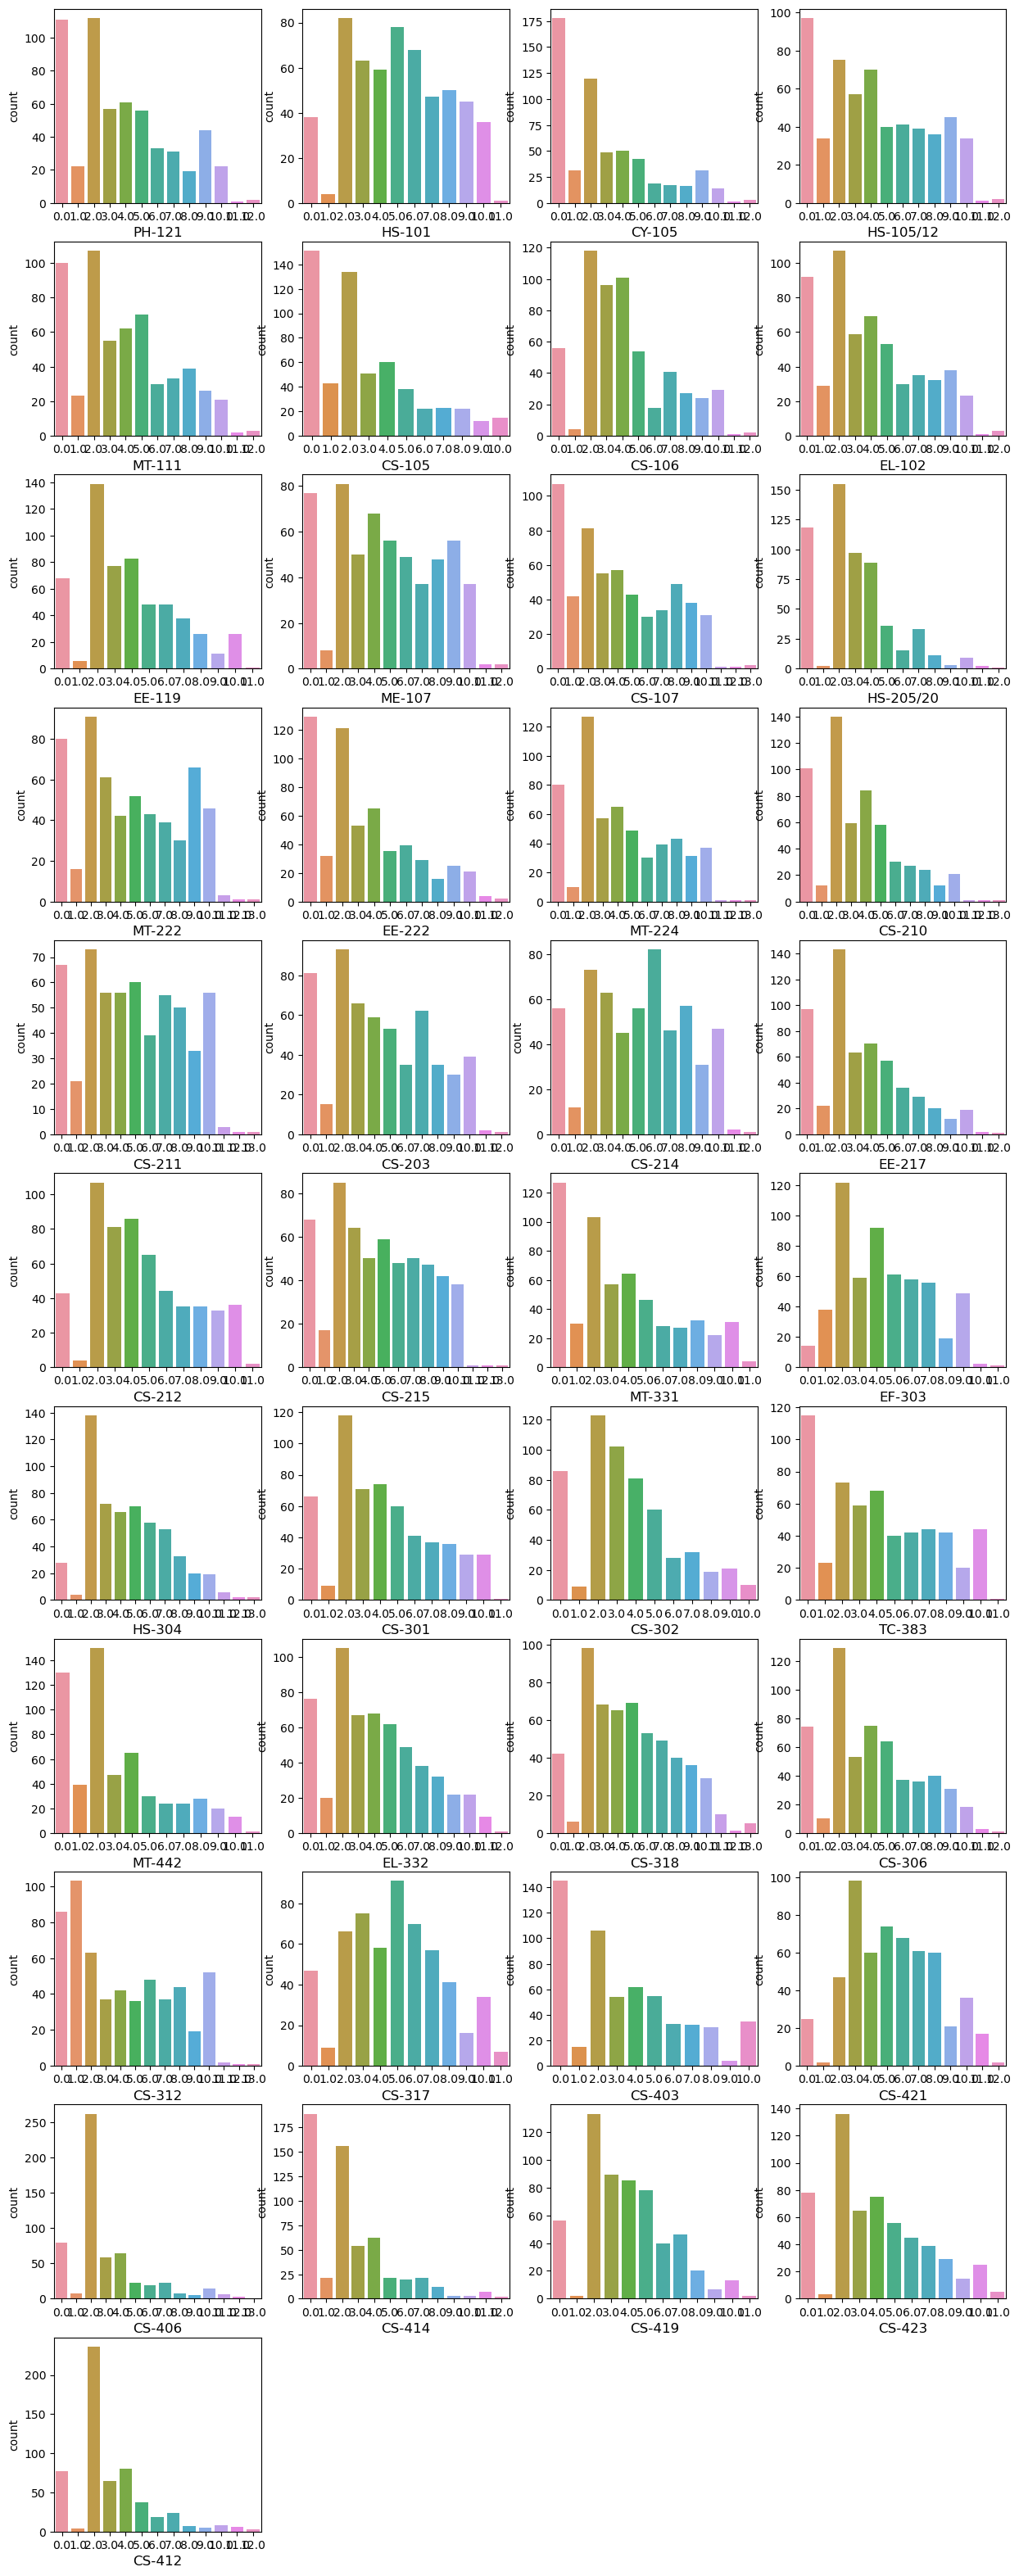

In [55]:
plt.figure(figsize=(15,40))
pltno=1
for column in X:
    if pltno<=41:
        plt.subplot(11,4,pltno)
        sns.countplot(X[column])
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

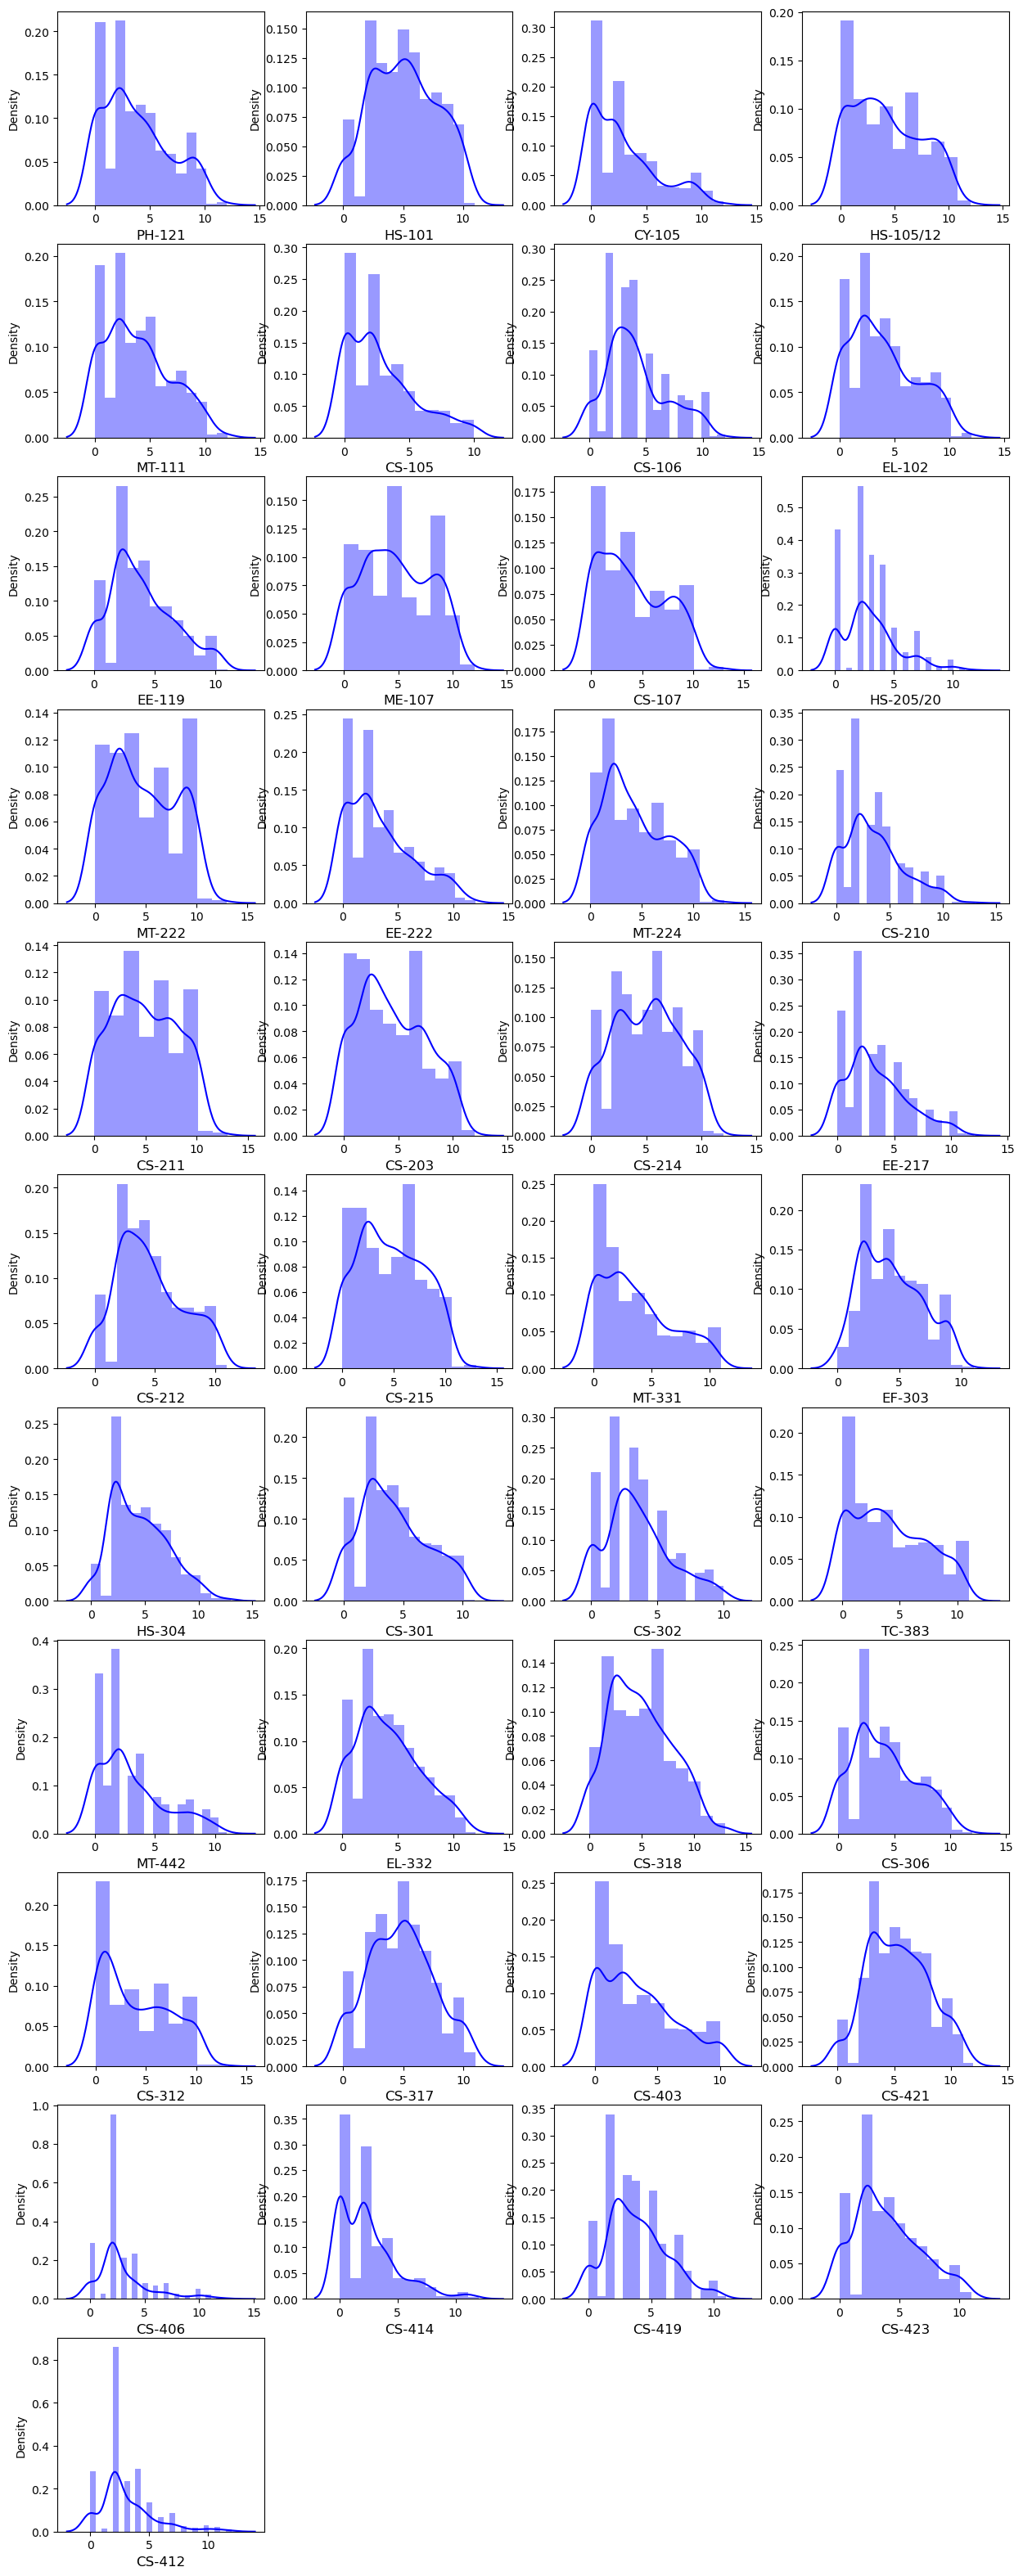

In [52]:
plt.figure(figsize=(15,40))
pltno=1
for column in X:
    if pltno<=41:
        plt.subplot(11,4,pltno)
        sns.distplot(X[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Plot for 'CGPA' column

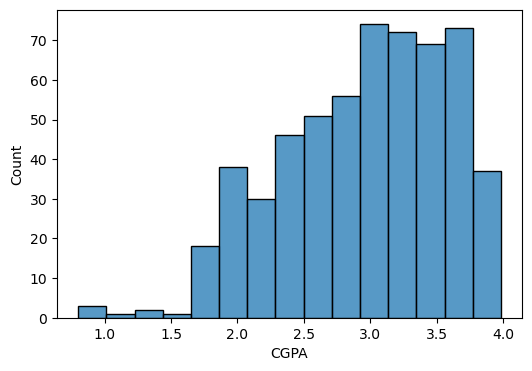

In [48]:
plt.figure(figsize=(6,4))
sns.histplot(data['CGPA'])
plt.show()

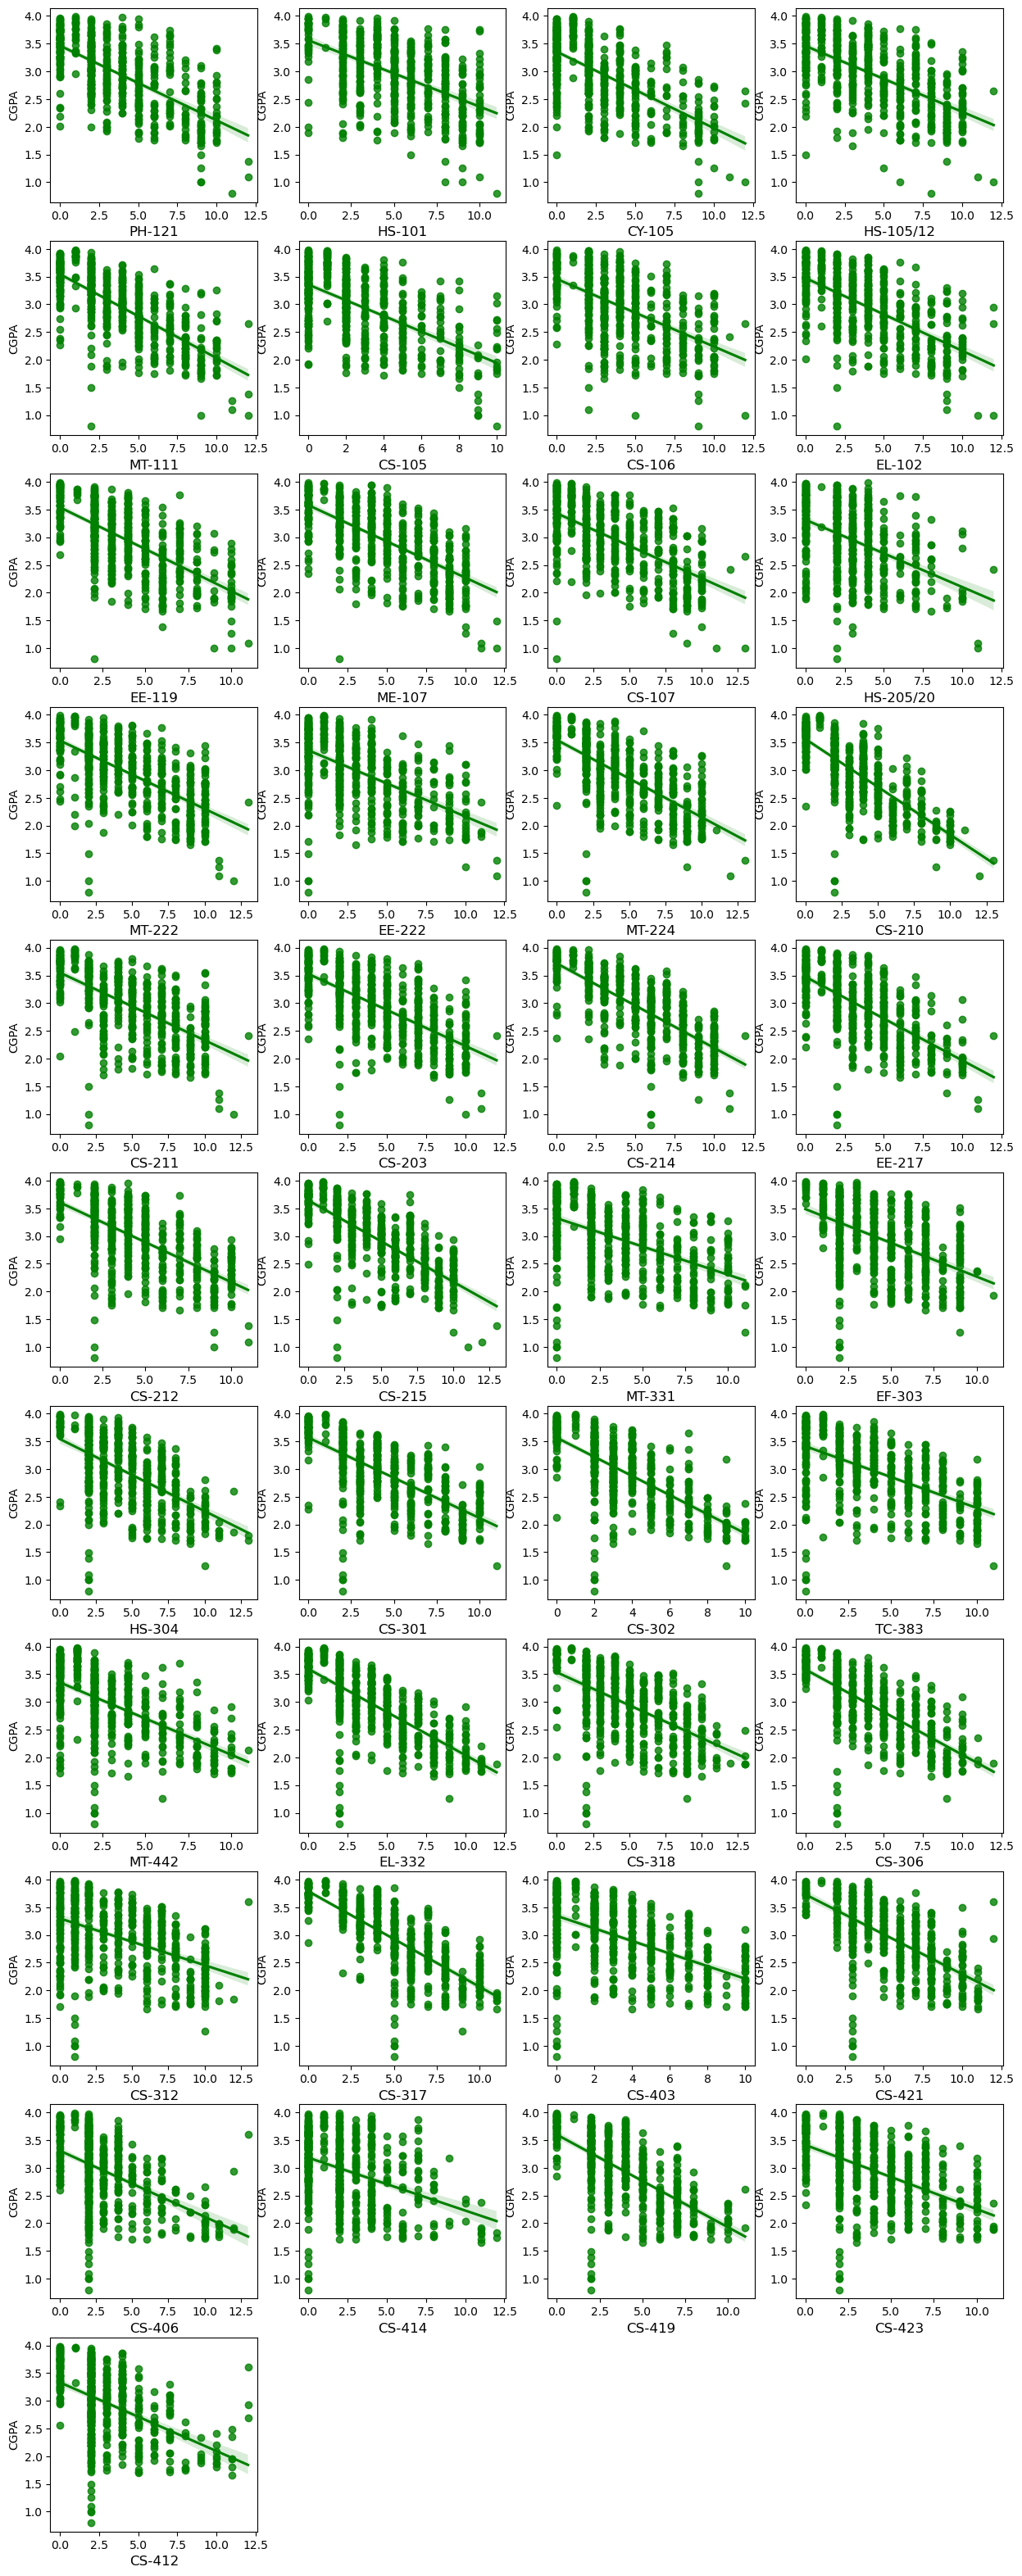

In [61]:
plt.figure(figsize=(15,40))
pltno=1
for column in data:
    if pltno<=41:
        plt.subplot(11,4,pltno)
        sns.regplot(x=X[column], y=data['CGPA'], color='g')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()


In [76]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)
X.tail()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360
570,0.728893,1.411559,2.059854,0.549869,0.704413,2.657832,-0.411990,1.003797,0.796111,1.660810,...,2.065879,0.871643,0.425358,0.526322,1.325686,3.250269,2.243495,0.060322,1.802087,2.124628


### # Model Bulding

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [78]:
# Finding the best Random State
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)
    

Max R2 Score is :   0.9687445129503746 And @ Random State :   72


In [79]:
x_train,x_test,y_train,y_test=train_test_split(X ,y ,test_size=0.25, random_state = maxrs)

In [80]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   91.6719620346421  %
R2 Score on test data :   96.87445129503746  %
Mean Absolute Error :   0.08446318730509092
Mean Squared Error :   0.012406125791165895
Root Mean Squared Error :   0.11138278947470248


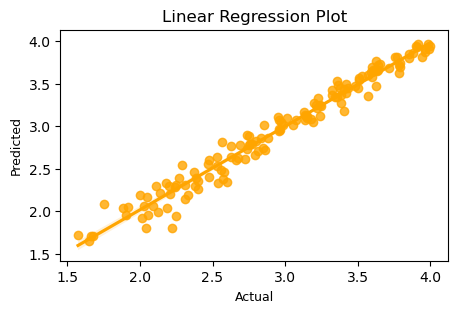

In [81]:
plt.figure(figsize=(5,3))
sns.regplot(x=ln_pred_test, y=y_test, color='orange')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Linear Regression Plot', fontsize=12)
plt.show()

In [83]:
# importing more libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [84]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   91.65516210384581  %
R2 Score on test data :   97.1050176010806  %
Mean Absolute Error :   0.0842167832167832
Mean Squared Error :   0.011490947412587408
Root Mean Squared Error :   0.10719583673159797


In [85]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   98.76741766783123  %
R2 Score on test data :   94.19096670978246  %
Mean Absolute Error :   0.10708461538461525
Mean Squared Error :   0.023057582692307652
Root Mean Squared Error :   0.1518472347206483


In [86]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   96.27924139343872  %
Mean Absolute Error :   0.08905566433566427
Mean Squared Error :   0.014768670613985995
Root Mean Squared Error :   0.12152641940741114


In [87]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   85.44126804418887  %
Mean Absolute Error :   0.17370629370629367
Mean Squared Error :   0.05778744055944055
Root Mean Squared Error :   0.24039018399144452


In [88]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   91.6718793717816  %
R2 Score on test data :   96.8904825682866  %
Mean Absolute Error :   0.0842671620612115
Mean Squared Error :   0.01234249344648172
Root Mean Squared Error :   0.11109677513988298


In [89]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   99.59927889771741  %
R2 Score on test data :   96.87049123372769  %
Mean Absolute Error :   0.08237932110082066
Mean Squared Error :   0.012421844317219181
Root Mean Squared Error :   0.11145332797731605


In [90]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   96.18603022780805  %
R2 Score on test data :   97.43580539302191  %
Mean Absolute Error :   0.07402815416970984
Mean Squared Error :   0.010177963567386034
Root Mean Squared Error :   0.10088589379782505


### # Cross Validation Score

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [95]:
#Linear Regression Model
score1=cross_val_score(ln,X,y,cv=5,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
Avg Score :  0.9034513625626615
Difference between CV score and R2 Score is  :  6.52931503877131 %


In [96]:
# KNN Model
score2=cross_val_score(knn,X,y,cv=5,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.88957963 0.9359176  0.8654431  0.96068931 0.80762497]
Avg Score :  0.891850920275352
Difference between CV score and R2 Score is  :  7.919925573545406 %


In [97]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y,cv=5,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.90721314 0.92676753 0.94034587 0.92192867 0.84977185]
Avg Score :  0.9092054102504884
Difference between CV score and R2 Score is  :  3.2704256847336244 %


In [100]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y,cv=5,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.91442649 0.95615718 0.94193535 0.94779215 0.87612399]
Avg Score :  0.9272870327633805
Difference between CV score and R2 Score is  :  3.5505381171006656 %


In [102]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y,cv=5,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [0.82219093 0.81266254 0.90470251 0.78760834 0.71831544]
Avg Score :  0.8090959520206212
Difference between CV score and R2 Score is  :  4.531672842126744 %


In [103]:
# Ridge model
score6=cross_val_score(Ri,X,y,cv=5,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.89292168 0.93429658 0.90102969 0.94099039 0.84890717]
Avg Score :  0.9036291005426632
Difference between CV score and R2 Score is  :  6.5275725140202745 %


In [105]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y,cv=5,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.91712896 0.9572992  0.9567591  0.94922069 0.87427666]
Avg Score :  0.9309369215114998
Difference between CV score and R2 Score is  :  3.7767990825777087 %


In [106]:
# SVR model
score8=cross_val_score(svr,X,y,cv=5,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

Score :  [0.89656309 0.92627299 0.90977131 0.9411797  0.85204761]
Avg Score :  0.9051669400105776
Difference between CV score and R2 Score is  :  6.91911139196415 %


#### So our best performing model is Random Forest Regressor Model ,
R2 Score on Train data :   98.76741766783123  %   
R2 Score on test data :   94.19096670978246  %   
Mean Absolute Error :   0.10708461538461525   
Mean Squared Error :   0.023057582692307652   
Root Mean Squared Error :   0.1518472347206483   
   
Avg Score :  0.9092054102504884  
Difference between CV score and R2 Score is  :  3.2704256847336244 %


### # Hyper parameter tuning

In [107]:
from sklearn.model_selection import GridSearchCV

In [111]:
params={'n_estimators': [100, 200, 300, 400],
    'criterion':['squared_error','absolute_error'],
    'max_depth': [None,3, 4, 5],
    'min_samples_split': [2, 5, 10, 14],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': [1.0,'sqrt','log2'],}

In [115]:
grid_search = GridSearchCV(estimator=RF,param_grid=params,cv=kf)

In [116]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 3, 4, 5],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10, 14],
                         'n_estimators': [100, 200, 300, 400]})

In [117]:
print('Best Score  : ',grid_search.best_score_)
print('\nBest Parameters : ', grid_search.best_params_)

Best Score  :  0.9120930721643882

Best Parameters :  {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [119]:
Final_Model=RandomForestRegressor(criterion= 'absolute_error', max_depth= None, max_features= 'sqrt',
                                  min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
Final_Model.fit(x_train,y_train)
Final_Model_pred_test=Final_Model.predict(x_test)
Final_Model_pred_train=Final_Model.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Final_Model_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Final_Model_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Final_Model_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Final_Model_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Final_Model_pred_test)))

R2 Score on Train data :   98.82119399337998  %
R2 Score on test data :   96.34070070695948  %
Mean Absolute Error :   0.08616171328671322
Mean Squared Error :   0.014524722415909082
Root Mean Squared Error :   0.12051855631357804


In [121]:
#saving the model
import pickle
pickle.dump(Final_Model, open('Student_grades_predication_project.pkl', 'wb'))


In [122]:
#load model
load_model=pickle.load(open('Student_grades_predication_project.pkl', 'rb'))
final_result=load_model.score(x_test,y_test)
print('The Final Result is  :  ',final_result*100)

The Final Result is  :   96.34070070695948


In [123]:
#comparing results
compare=pd.DataFrame({'Predicted' : load_model.predict(x_test), 'Actual' : y_test})
compare

,Predicted,Actual
512,2.26725,2.288
531,3.46619,3.566
487,3.09465,3.114
344,2.38874,2.384
183,2.53683,2.311
...,...,...
540,3.74565,3.765
136,1.98077,1.714
177,3.34012,3.369
462,3.33315,3.339


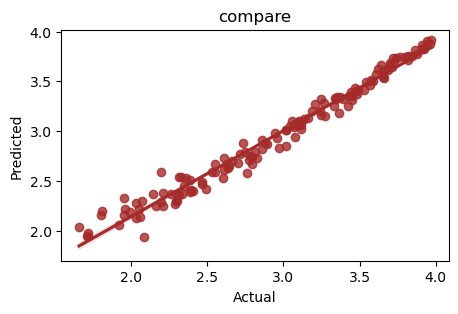

In [127]:
plt.figure(figsize=(5,3))
sns.regplot(x=compare['Actual'], y=compare['Predicted'], color='brown')
plt.title('compare')
plt.show()